### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# ResNet

*Author: Pytorch Team*

**Deep residual networks pre-trained on ImageNet**

<img src="https://pytorch.org/assets/images/resnet.png" alt="alt" width="50%"/>

In [2]:
import torch
# model = torch.hub.load('pytorch/vision:v0.4.2', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.4.2', 'resnet34', pretrained=True)
model = torch.hub.load('pytorch/vision:v0.4.2', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.4.2', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.4.2', 'resnet152', pretrained=True)
model.eval()

Using cache found in /home/alice33cyw/.cache/torch/hub/pytorch_vision_v0.4.2


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [2]:
# Download an example image from the pytorch website
import urllib
# url, filename = ("https://github.com/pytorch/hub/raw/master/dog.jpg", "dog.jpg")
# url, filename = ("https://www.allrecipes.com/recipe/100008/homemade-pickled-ginger-gari.jpg", "homemade-pickled-ginger-gari.jpg")
# try: urllib.URLopener().retrieve(url, filename)
# except: urllib.request.urlretrieve(url, filename)


In [3]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
# input_image = Image.open("httpswwwallrecipescomrecipe100008homemade-pickled-ginger-gari.jpg")
input_image = Image.open("httpswwwallrecipescomrecipe100011pork-and-black-bean-stew.jpg")
# input_image = Image.open("httpswwwallrecipescomrecipe10007evelyns-cornflake-cookies.jpg")
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')
    
labels = []    
with open('imagenet_synsets.txt') as f:
#     label = [line.strip() for line in f.readlines()]
    line = [line.strip() for line in f.readlines()]
    for l in line:
        l = l.split(' ')
        labels.append(' '.join(l[1:]))

with torch.no_grad():
    output = model(input_batch)
_, indices = torch.sort(output, descending=True)
percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100


print([(labels[idx], round(percentage[idx].item(),4)) for idx in indices[0][:5]])
# # Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
# # The output has unnormalized scores. To get probabilities, you can run a softmax on it.
# print(torch.nn.functional.softmax(output[0], dim=0))
# print(percentage)

[('parachute, chute', 43.7014), ('parallel bars, bars', 15.3212), ('chocolate sauce, chocolate syrup', 11.3908), ('rubber eraser, rubber, pencil eraser', 8.5253), ('horizontal bar, high bar', 3.6337)]


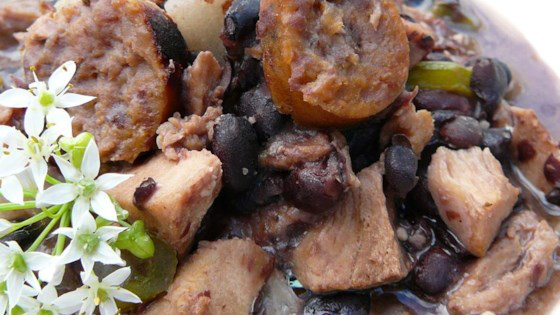

In [4]:
input_image

### Model Description

Resnet models were proposed in "Deep Residual Learning for Image Recognition".
Here we have the 5 versions of resnet models, which contains 5, 34, 50, 101, 152 layers respectively.
Detailed model architectures can be found in Table 1.
Their 1-crop error rates on imagenet dataset with pretrained models are listed below.

| Model structure | Top-1 error | Top-5 error |
| --------------- | ----------- | ----------- |
|  resnet18       | 30.24       | 10.92       |
|  resnet34       | 26.70       | 8.58        |
|  resnet50       | 23.85       | 7.13        |
|  resnet101      | 22.63       | 6.44        |
|  resnet152      | 21.69       | 5.94        |

### References

 - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)